<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

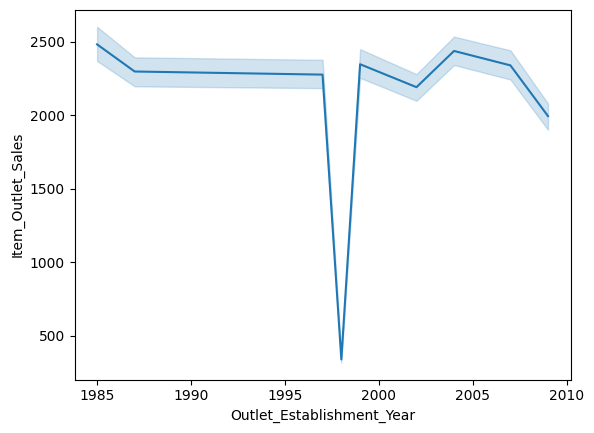

In [24]:
sns.lineplot(x=df['Outlet_Establishment_Year'], y=df['Item_Outlet_Sales'])


In [23]:
#4 What items do they sell?
top_items = df_filtered.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(10)
print(top_items)


Item_Type
Fruits and Vegetables    1.892175e+06
Snack Foods              1.803071e+06
Household                1.359339e+06
Frozen Foods             1.165077e+06
Dairy                    1.000389e+06
Canned                   9.782273e+05
Baking Goods             8.211271e+05
Health and Hygiene       6.767504e+05
Soft Drinks              6.113109e+05
Meat                     6.091071e+05
Name: Item_Outlet_Sales, dtype: float64


   Outlet_Establishment_Year        Outlet_Type  Item_Outlet_Sales
0                       1985      Grocery Store       1.796941e+05
1                       1985  Supermarket Type3       3.453926e+06
2                       1987  Supermarket Type1       2.142664e+06
3                       2002  Supermarket Type1       2.036725e+06
4                       2004  Supermarket Type1       2.268123e+06
5                       2007  Supermarket Type1       2.167465e+06


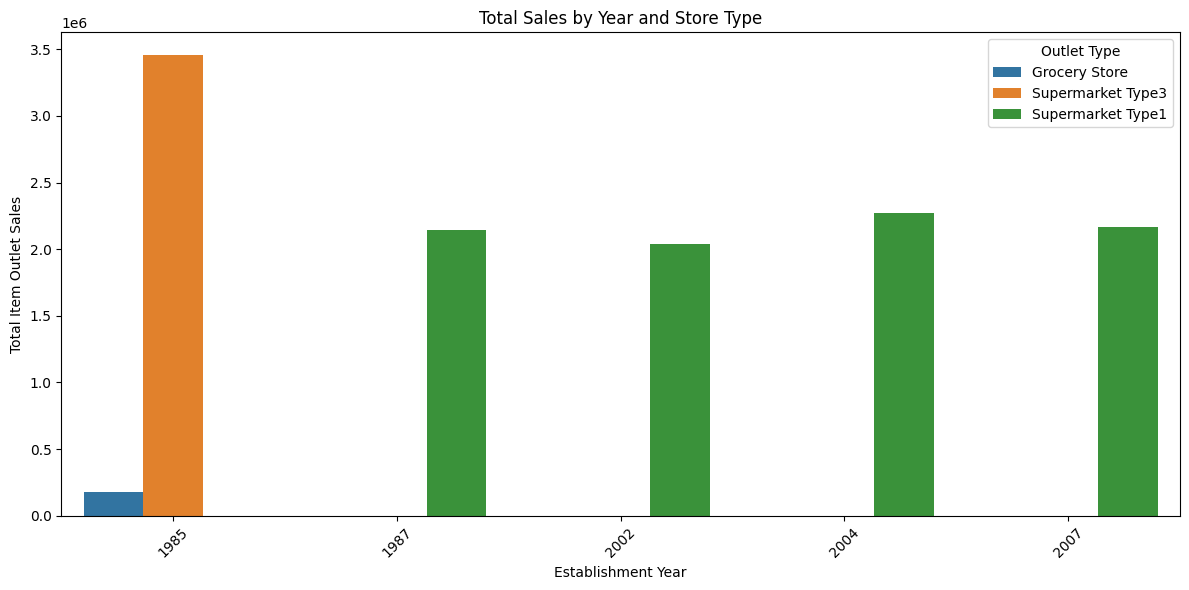

In [22]:
#3 what type of stores are they
store_types = df_filtered.groupby(['Outlet_Establishment_Year', 'Outlet_Type'])['Item_Outlet_Sales'].sum().reset_index()
print(store_types)

plt.figure(figsize=(12,6))
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', hue='Outlet_Type', data=store_types)

plt.title('Total Sales by Year and Store Type')
plt.ylabel('Total Item Outlet Sales')
plt.xlabel('Establishment Year')
plt.xticks(rotation=45)
plt.legend(title='Outlet Type')
plt.tight_layout()
plt.show()




In [20]:
#2.Check sales by year
#Result is in scientific format by pandas because of large numbers
sales_by_year = df_filtered.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
print(sales_by_year)


Outlet_Establishment_Year
1985    3.633620e+06
2004    2.268123e+06
2007    2.167465e+06
1987    2.142664e+06
2002    2.036725e+06
Name: Item_Outlet_Sales, dtype: float64


In [19]:
#Find out why the sales of the store, established from 1985 to 1990 and from 2000 to 2008, were high. What type of stores are those? And what type of items do they sell?
#so analyse that:
#Why do stores opened from 1985–1990 and 2000–2008 have high sales?
#What kind of stores are they?
#What kind of items do they sell?

#1. Filter stores by Establishment year

df_filtered = df[(df['Outlet_Establishment_Year'].between(1985, 1990)) | (df['Outlet_Establishment_Year'].between(2000, 2008))]


<Axes: xlabel='Item_Visibility', ylabel='Item_MRP'>

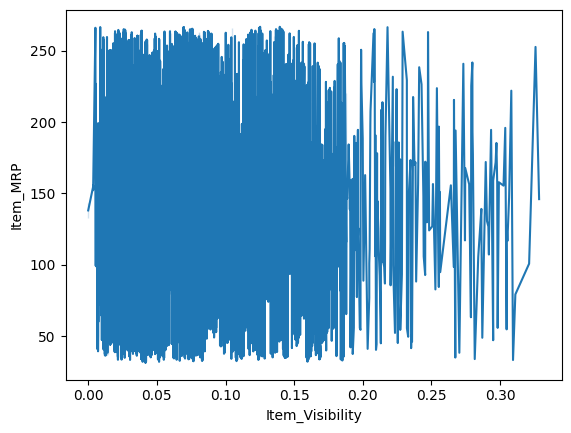

In [18]:
sns.lineplot(x=df['Item_Visibility'], y=df['Item_MRP'])

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

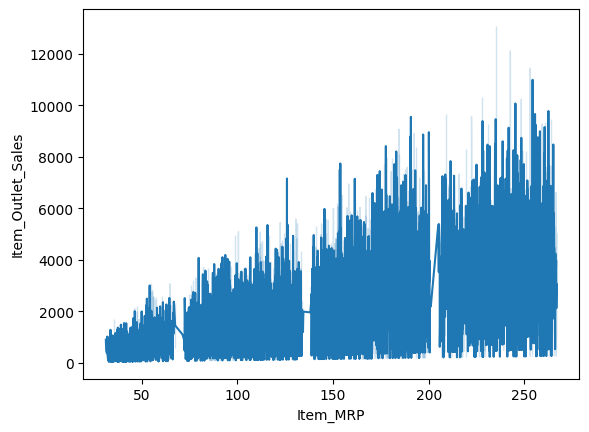

In [17]:
sns.lineplot(x=df['Item_MRP'], y=df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

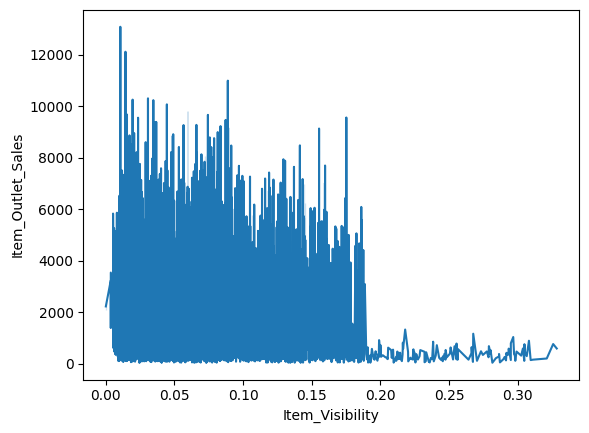

In [16]:
sns.lineplot(x=df['Item_Visibility'], y=df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

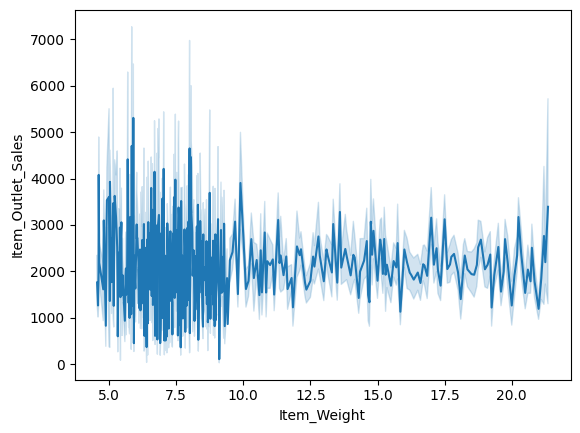

In [15]:
sns.lineplot(x=df['Item_Weight'], y=df['Item_Outlet_Sales'])

In [14]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [13]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [12]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [11]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [10]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [9]:
df.columns.tolist()

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
import os
print(os.getcwd())


D:\course\ML\ML-Project-E2E-1


In [4]:
df = pd.read_csv('data/raw/train.csv')

In [3]:
os.getcwd()

'D:\\course\\ML\\ML-Project-E2E-1'

In [2]:
os.chdir("D:/course/ML/ML-Project-E2E-1")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns